In [543]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [557]:
import modules.NaiveBayesClassifier as nbc
import modules.MixtureModels as mm
import modules.hidden_markov_model as hmm
import modules.directional_change as dc
import modules.generate_data as gd
import modules.trading_strategy as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Checking Naive Bayes and Mixture Models

In [558]:
'''Testing Code for Naive Bayes Classifier'''
n = 50 # Samples
N = 3 # Dimensions
K = 2 # Classes

X = np.random.normal(size=(n,N))
y = np.random.randint(K, size=n)

model = train_NBC(X, y)

In [559]:
X_test = np.random.normal(size=(5,N))
probs = nbc.get_predict_probs_NBC(model, X_test)

In [560]:
probs

array([[0.07100015, 0.92899985],
       [0.55960106, 0.44039894],
       [0.41949784, 0.58050216],
       [0.60305651, 0.39694349],
       [0.23403104, 0.76596896]])

In [561]:
'''Testing the mixture models'''

X = np.random.normal(size=(n,N))
y = np.random.randint(K, size=n)
model1 = nbc.train_NBC(X, y)

X = np.random.normal(size=(n,N))
y = np.random.randint(K, size=n)
model2 = nbc.train_NBC(X, y)

X = np.random.normal(size=(n,N))
y = np.random.randint(K, size=n)
model3 = nbc.train_NBC(X, y)


In [562]:
X_test = np.random.normal(size=(5,N))
q = np.array([25,25,50])

In [563]:
probs1 = get_predict_probs_NBC( model1, X_test )
probs2 = get_predict_probs_NBC( model2, X_test )
probs3 = get_predict_probs_NBC( model3, X_test )


In [564]:
probs1

array([[0.69295498, 0.30704502],
       [0.12708483, 0.87291517],
       [0.59815885, 0.40184115],
       [0.42346435, 0.57653565],
       [0.40698468, 0.59301532]])

In [565]:
probs2

array([[0.434289  , 0.565711  ],
       [0.3105086 , 0.6894914 ],
       [0.54515753, 0.45484247],
       [0.47975665, 0.52024335],
       [0.47198228, 0.52801772]])

In [566]:
probs3

array([[0.56081057, 0.43918943],
       [0.46164811, 0.53835189],
       [0.41281066, 0.58718934],
       [0.50322679, 0.49677321],
       [0.61979287, 0.38020713]])

In [567]:
mm.get_probabilities_mixture_models(([probs1, probs2, probs3]), q)

array([[0.56221628, 0.43778372],
       [0.34022241, 0.65977759],
       [0.49223442, 0.50776558],
       [0.47741865, 0.52258135],
       [0.52963818, 0.47036182]])

## Checking DC Data stuff and fit_hmm

In [462]:
'''Testing trading startegy'''
data = dc.get_data(['^GSPC'], '2010-01-01', 6.5)
theta = 0.075

[*********************100%***********************]  1 of 1 completed


In [463]:
d2 = dc.get_DC_data_v2( data, theta)

In [464]:
data

Date
2010-01-04 00:00:00    1132.989990
2010-01-04 06:30:00    1116.560059
2010-01-05 00:00:00    1136.520020
2010-01-05 06:30:00    1132.660034
2010-01-06 00:00:00    1137.140015
                          ...     
2022-12-28 06:30:00    3829.560059
2022-12-29 00:00:00    3849.280029
2022-12-29 06:30:00    3805.449951
2022-12-30 00:00:00    3839.500000
2022-12-30 06:30:00    3829.060059
Length: 6544, dtype: float64

In [465]:
d1 = dc.get_DC_data(data, 0.05)

In [466]:
d1

[(Timestamp('2011-08-04 00:00:00'),
  1200.0699462890625,
  Timestamp('2011-08-02 06:30:00'),
  1286.56005859375),
 (Timestamp('2020-03-04 00:00:00'),
  3130.1201171875,
  Timestamp('2020-03-02 06:30:00'),
  2974.280029296875),
 (Timestamp('2020-03-09 00:00:00'),
  2746.56005859375,
  Timestamp('2020-03-05 06:30:00'),
  3075.699951171875),
 (Timestamp('2020-03-13 00:00:00'),
  2711.02001953125,
  Timestamp('2020-03-12 00:00:00'),
  2480.639892578125),
 (Timestamp('2020-03-16 00:00:00'),
  2386.1298828125,
  Timestamp('2020-03-13 00:00:00'),
  2711.02001953125),
 (Timestamp('2020-03-17 00:00:00'),
  2529.18994140625,
  Timestamp('2020-03-16 00:00:00'),
  2386.1298828125),
 (Timestamp('2020-03-18 00:00:00'),
  2398.10009765625,
  Timestamp('2020-03-17 00:00:00'),
  2529.18994140625),
 (Timestamp('2020-03-24 00:00:00'),
  2447.330078125,
  Timestamp('2020-03-23 00:00:00'),
  2237.39990234375)]

In [467]:
TMV = dc.get_TMV(d1, theta)
TMV

2020-03-02 06:30:00    17.490775
2020-03-05 06:30:00     0.454653
2020-03-12 00:00:00    -2.579619
2020-03-13 00:00:00     1.238283
2020-03-16 00:00:00    -1.597874
2020-03-17 00:00:00     0.799398
2020-03-23 00:00:00    -1.538253
dtype: float64

In [468]:
T = dc.get_T( d1 )
T

2020-03-02 06:30:00    3135.000000
2020-03-05 06:30:00       3.000000
2020-03-12 00:00:00       6.708333
2020-03-13 00:00:00       1.000000
2020-03-16 00:00:00       3.000000
2020-03-17 00:00:00       1.000000
2020-03-23 00:00:00       6.000000
dtype: float64

In [469]:
R = dc.get_R( TMV, T, theta )
R

2020-03-02 06:30:00    0.000418
2020-03-05 06:30:00    0.011366
2020-03-12 00:00:00   -0.028840
2020-03-13 00:00:00    0.092871
2020-03-16 00:00:00   -0.039947
2020-03-17 00:00:00    0.059955
2020-03-23 00:00:00   -0.019228
dtype: float64

Fitting a model with 7 free scalar parameters with only 4 data points will result in a degenerate solution.
Fitting a model with 7 free scalar parameters with only 4 data points will result in a degenerate solution.
Fitting a model with 7 free scalar parameters with only 4 data points will result in a degenerate solution.
Fitting a model with 7 free scalar parameters with only 4 data points will result in a degenerate solution.
Fitting a model with 7 free scalar parameters with only 4 data points will result in a degenerate solution.
Fitting a model with 7 free scalar parameters with only 4 data points will result in a degenerate solution.
Fitting a model with 7 free scalar parameters with only 4 data points will result in a degenerate solution.
Fitting a model with 7 free scalar parameters with only 4 data points will result in a degenerate solution.
Fitting a model with 7 free scalar parameters with only 4 data points will result in a degenerate solution.
Fitting a model with 7 free 

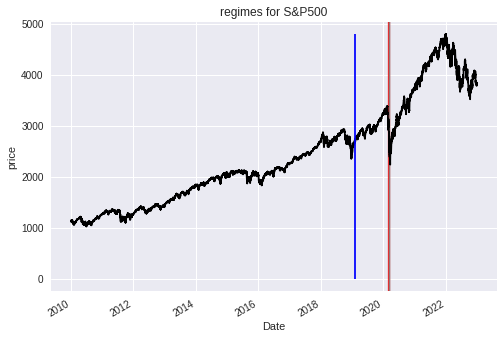

In [470]:
regimes, model = hmm.fit_hmm(2, data, R, 'S&P500', plot = True)

# Trading Strategy Tests

[*********************100%***********************]  1 of 1 completed


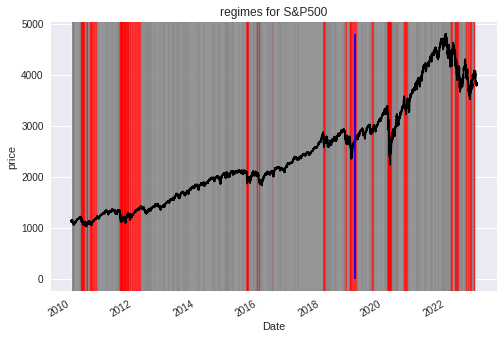

Total duration of time: 407053800.0
Total duration spend in Regime 0: 341530200.0
Proportion of time spend in Regime 0: 0.8390296319552846


In [536]:
data = dc.get_data(['^GSPC'], '2010-01-01', 6.5)
theta = 0.025
DC = dc.get_DC_data_v2( data, theta)

TMV = dc.get_TMV(DC, theta)
T = dc.get_T( DC )
R = dc.get_R( TMV, T, theta )

regimes, model = hmm.fit_hmm(2, data, R, 'S&P500', plot = True)
regimes_filtered = hmm.standardize_regime_labels(regimes, True)

In [537]:
data.head()

Date
2010-01-04 00:00:00    1132.989990
2010-01-04 06:30:00    1116.560059
2010-01-05 00:00:00    1136.520020
2010-01-05 06:30:00    1132.660034
2010-01-06 00:00:00    1137.140015
dtype: float64

In [528]:
init_cap = 1
threshold = 2

df = gd.generate_dataset_with_columns( data, DC, regimes_filtered, theta )
df1 = ts.strategy_regime_dependent(df, init_cap=init_cap, strat='JC1', threshold = threshold)
df2 = ts.strategy_control(df1, init_cap=init_cap, strat='CT1', threshold = threshold)
data = df2

In [529]:
ts.get_sharpe( data, 'daily_ret_JC1' )

0.3548781770830093

In [530]:
ts.get_sharpe( data, 'daily_ret_CT1' )

0.14807997831874123

In [531]:
ts.get_profit( data, 'total_cap_JC1' )

1.1251488195692048

In [532]:
ts.get_profit( data, 'total_cap_CT1' )

0.13873784393037725

In [533]:
ts.get_drawdown( data, 'daily_ret_JC1' )

0.21002452068707864

In [534]:
ts.get_drawdown( data, 'daily_ret_CT1' )

0.37337447657761014

In [535]:
ts.get_metrics_trading_strategy( data, ['JC1', 'CT1'] )

{'JC1': {'drawdown': 0.21002452068707864,
  'profit': 1.1251488195692048,
  'sharpe': 0.3548781770830093},
 'CT1': {'drawdown': 0.37337447657761014,
  'profit': 0.13873784393037725,
  'sharpe': 0.14807997831874123}}

## Trading strategy pipeline for loss function

In [553]:
'''Function for loss- returns dictionary'''
ts.get_loss_function_for_pipeline( data, DC, regimes, theta, init_cap = 1, strat = 'JC1', threshold = 1)

{'JC1': {'drawdown': 0.23612159248636705,
  'profit': 2.456361443791959,
  'sharpe': 0.4475908293107351}}